<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = '../datasets/sacramento_real_estate_transactions.csv'

In [2]:
import pandas as pd

shd = pd.read_csv(sac_csv)

shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [3]:
# Check the dtypes.
shd.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [4]:
# Zip code works better as a string object (categorical) so we will have to convert it.
shd['zip'] = shd['zip'].astype(str)

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [5]:
# Check out the summary statistics:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [6]:
# It appears that we have some values that are out of place, as there are
# houses with 0 bedrooms, 0 baths, negative square footage, and negative prices.  
# There are also some bizarre longitudes/latitudes in our data set. A house in Antarctica perhaps? 

In [7]:
# Check out the cities. Most cities have very few observations.
shd['city'].value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
FAIR OAKS            9
CAMERON PARK         9
AUBURN               5
WILTON               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
GRANITE BAY          3
POLLOCK PINES        3
RANCHO MURIETA       3
LOOMIS               2
EL DORADO            2
MEADOW VISTA         1
GREENWOOD            1
GARDEN VALLEY        1
FORESTHILL           1
PENRYN               1
COOL                 1
SLOUGHHOUSE          1
MATHER               1
WALNUT GROVE         1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
Name: city, dtype: int64

In [8]:
# What could explain the houses with 0 bedrooms?
shd[shd['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


In [13]:
shd[shd['beds'] == 0].shape

(108, 12)

In [14]:
# Given the large number of houses that have 0 beds, 0 baths and 0 square feet, 
# we can make an assumption that these are plots of land that haven't had anything built on them yet.
# As a result we will *not* be dropping them.

In [15]:
# What about the houses that are less than 0 dollars?
shd[shd['price'] < 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [16]:
# And the houses with negative square footage?
shd[shd['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [17]:
# It looks like the house with a negative price is also the one with negative square footage.
# It is time to make a choice: Either assume that the data were entered improperly and are meant 
# to be positive, or drop the data altogether.

# Side note: Notice the state is actually labeled incorrectly as well.

In [18]:
# Let's check if any other values are labeled incorrectly.
shd[shd['state'] != 'CA']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [19]:
# It looks like only one row is mislabeled, so we'll just drop that row.

shd.drop(703, inplace = True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [20]:
# 'Beds','baths', and'sq__ft' seem like they would be valid potential predictors.
# 'Latitude' and 'longitude' are other options to consider, but those are more involved.

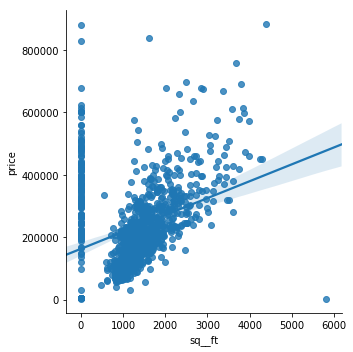

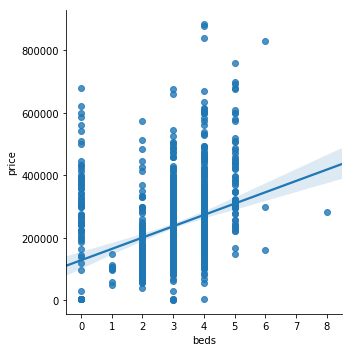

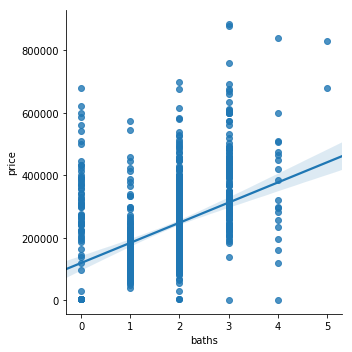

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.lmplot(x='sq__ft', y='price', data=shd)
plt.show()
sns.lmplot(x='beds', y='price', data=shd)
plt.show()
sns.lmplot(x='baths', y='price', data=shd)
plt.show()

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

It looks like square footage is a better predictor of price than number of beds or baths.  
Beds and baths are discrete measures as opposed to square footage, which is a continuous measure.    
Additionally, there are likely strong correlations between the square footage and numbers of bedrooms and bathrooms, in that houses  with greater square footage will likely have more bedrooms and bathrooms.  
  
If we dropped all of the plots of land that are in the data set (those with 0 sq ft, beds, and baths), we would see a much stronger trend line in our lm plot.

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [23]:
import numpy as np
import scipy.stats

# Get the optimal slope and y intercept.

def lin_reg(x,y):
    # Using other libraries for standard deviation and 
    # the Pearson correlation coefficient.
    # Note that in SLR, the correlation coefficient 
    # multiplied by the standard
    # deviation of y divided by standard deviation 
    # of x is the optimal slope.
    beta_1 = (scipy.stats.pearsonr(x,y)[0]) * (np.std(y)/np.std(x))
    
    # The Pearson correlation coefficient returns a tuple, 
    # so it needs to be sliced/indexed.
    # The optimal beta is found by: mean(y) - b1 * mean(x).
    beta_0 = np.mean(y) - ( beta_1 * np.mean(x) ) 
    
    #Print the optimal values.
    print('The Optimal Y Intercept is ', beta_0)
    print('The Optimal slope is ', beta_1)

In [24]:
x = shd['sq__ft'].values
y = shd['price'].values
lin_reg(x,y)

The Optimal Y Intercept is  162938.7375609862
The Optimal slope is  54.15619752295772


### 6. Interpret the intercept. Interpret the slope.

The intercept is an "offset." Without the intercept, our regression line would be forced to pass through the origin.  

The slope is the increase in our target variable (price) for every 1-unit increase in our predictor variable (sq\__ft). So in our example, for every sq__ft increase there is an associated increase of ~54 dollars in price (after taking in account the offset).   

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

#### Prediction:
You are a real estate agent with a separate database on house characteristics and locations.
You want to estimate what price one of these houses will most likely sell for based on the model that we built using this data.

#### Inference:
You work for an architecture company that wants to understand what specific locations and housing characteristics are associated with perceived value. You have some hypotheses about what makes a house valuable but you would like to test these hypotheses.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [25]:
# Predictor: y = 162938.74 + 54.16x
# Creating a list of predicted values:
y_pred = []

for x in shd['sq__ft']:
    y = 162938.74 + (54.16*x)
    y_pred.append(y)


In [26]:
# Appending the predicted values to the Sacramento housing DataFrame to do DF calcs:
shd['Pred'] = y_pred

# Residuals equals the difference between Y-True and Y-Pred:
shd['Residuals'] = abs(shd['price']-shd['Pred'])

In [27]:
shd['Residuals'].mean()
# The mean of our residuals is approximately $96,000, which means that 
# on average our prediction is off by this amount.

95954.3812601626

Text(0,0.5,'predicted values')

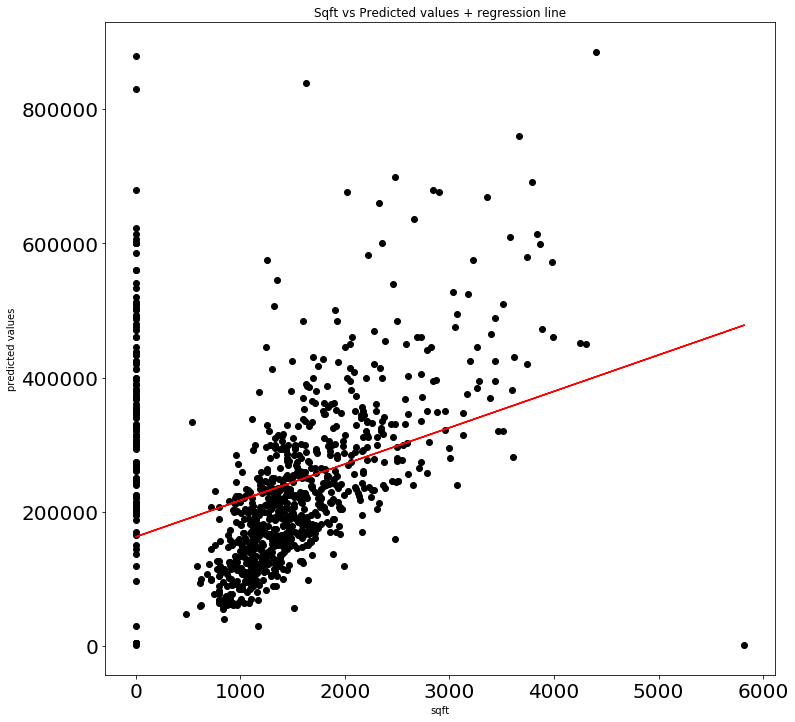

In [28]:
# Plot showing our linear forecast.
fig = plt.figure(figsize=(12,12))

# Change the font size of minor ticks label.
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# Get the axis of that figure.
ax = plt.gca()

# Plot a scatterplot on the axis using our data.
ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');
plt.title('Sqft vs Predicted values + regression line')
plt.xlabel('sqft')
plt.ylabel('predicted values')

Text(0,0.5,'predicted values')

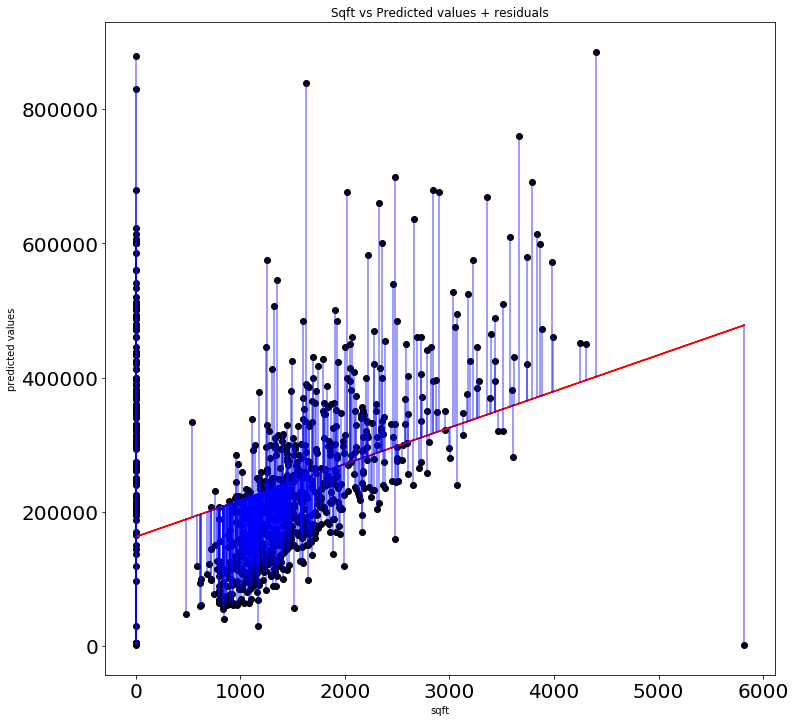

In [29]:
# Plot with residuals.
fig = plt.figure(figsize=(12,12))

# Change the font size of minor ticks label.
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# Get the axis of that figure.
ax = plt.gca()

# Plot a scatterplot on the axis using our data.
ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');

# Iterate over predictions.
for _, row in shd.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), 
             (row['price'], row['Pred']), 'b-', alpha=0.5)
    
plt.title('Sqft vs Predicted values + residuals')
plt.xlabel('sqft')
plt.ylabel('predicted values')

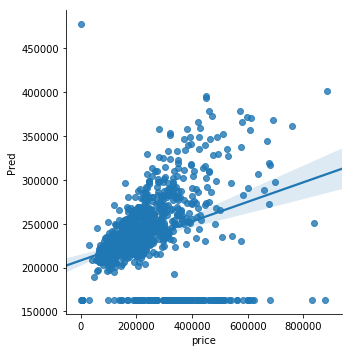

In [30]:
# One more plot; let's look at how our predictions compare to the true values.
sns.lmplot(x='price', y='Pred', data=shd)

Given our last visual, we can see that a lot of points were plotted along the y intercept (y= 162938.74). These were all the houses reported to have a square footage of 0. We could probably create a more insightful model if we removed those observations from our data.